## 【課題】CNNとはどういった手法なのか記述せよ

CNNとはどういったものでしょうか。一般的なディープラーニングとの比較もしながら説明してください

答え：CNNとは、一般的なディープラーニングが全結合層のニューラルネットワークであるという位置づけに対して、全結合層の前段階で、畳み込み層とプーリング層を含むニューラルネットワークをいう。つまり、CNNは畳み込み層＋プーリング層＋畳み込み層＋プーリング層…＋全結合層という組み合わせでできたものである。一般的なディープラーニングでは達成できない、位置関係の情報をニューラルネットワークに反映させ(畳み込みの趣旨)、かつ、同じクラス分類の画像(CNNは主に画像処理に使用させるものである)を精度を高く識別できる(プーリングの趣旨)ことを目的として設計されたものである。

## 【課題】畳み込み層とプーリング層について記述せよ

CNNにおける畳み込み層とプーリング層について説明してください。パディングとストライドとは何かということも含めてください。

答え(畳み込み層について)：何かしらのフィルタを設けて、そのフィルタを使って計算前のデータを小さくする層のことをいう。例えば、畳み込み計算前のデータが５×５のデータで、フィルタが３×３である場合、畳み込み計算後のデータは３×３になる(前提としてパディングを実施していない場合で、かつストライドが１の場合)。ここで、計算後のデータが元のデータより小さくなることを避けたい場合、元のデータを何かしらの数値で、補完することが必要になる。このような補完を行うことをパディングといい、例えば、先の例では、５×５を７×７にした場合、畳み込み計算後のデータは引き続き５×５になる（前提として、ストライドが１の場合）。次に、ストライドとは、フィルタを適用する間隔を指す。フィルタを１ずつスライドしていけば、上記の計算となるが、５×５のデータに３×３のフィルタをストライド２で多々小神子計算すると、畳み込み計算後のデータは２×２になる。つまり、計算後のデータの大きさを定めるものであるといえる。

答え（プーリング層について）：情報を圧縮する層である。範囲としては、例えば２×２といった範囲で、プーリング前のデータに対して適用し、その範囲で一定の方法でデータを抽出する。一定の方法としては、例えば、最大値や平均値といった方法がある。プーリングをすることで、同じクラスに属する画像で、多少位置が違っていても同じものとして分類できるようにするということが挙げられる。

## 【課題】CNNの精度を向上させるためにはどのようなことをするのが良いか記述せよ

CNNの精度を向上させたいときに行うことを説明してください。

答え：レイヤー(畳み込み層＋プーリング層を１セットとして)を増やす、畳み込み層のフィルター数を増やす、全結合層のレイヤー・ユニット数を増やす。ドロップアウトや、batchnormalizationを導入する。

## ※必要なライブラリをimport

In [127]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
%matplotlib inline

## 【課題】データの読み込み

In [110]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

## ※データセットの確認

In [51]:
print("x_train.shape", x_train.shape)
print("y_train.shape", y_train.shape)
print("x_test.shape", x_test.shape)
print("y_test.shape", y_test.shape)
print("y_test[0:10]", y_test[0:10])

x_train.shape (50000, 32, 32, 3)
y_train.shape (50000, 1)
x_test.shape (10000, 32, 32, 3)
y_test.shape (10000, 1)
y_test[0:10] [[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


In [50]:
len(y_train

50000

次に画像を1枚表示してみましょう。例として、馬(ラベルは7)を表示してみます。

In [89]:
tmp = np.where(y_train==7)[0][0]
tmp

7

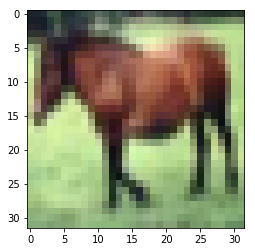

In [90]:
plt.imshow(x_train[tmp])

## 【課題】画像をまとめて表示

どのようなデータセットなのか確認するために、10種類それぞれを10枚ずつ、合計100枚の画像を表示させてください。データセットの前から抜き出していけば以下のようになります。

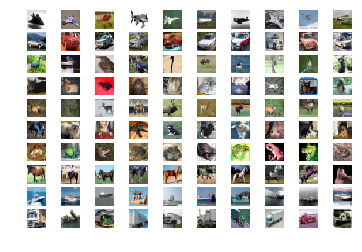

In [82]:
nclasses = 10
pos = 1

for i in range(nclasses):
    # クラスiの画像のインデックスリストを取得
    targets = np.where(y_train == i)[0]
    # 最初の10枚の画像を描画
    for idx in targets[:10]:
        plt.subplot(10, 10, pos)
        
        plt.imshow(x_train[idx])
        plt.axis('off')
        #label = y_train[i]
        pos += 1
plt.show()

## 【課題】大きさの取得

In [118]:
#画像サイズを取得
img_rows =  x_train[0].shape[1]
img_cols = x_train[0].shape[0]
#分類する数を取得
num_classes = len(set(y_train.flatten())) #flattenで2次元配列を1次元配列に変換している
#入力データの形状を取得
input_shape = x_train.shape[1:4]

## 【課題】正規化

In [121]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

## 【課題】one-hot表現への変換

正解ラベルを0か1の配列（one-hot表現）にしてください。

In [122]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## 【課題】モデルを作成

In [138]:
model = Sequential()
model.add(Conv2D(6, kernel_size=(5,5), strides=(1,1),padding="same", activation="relu", input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), padding="valid"))

In [139]:
model.add(Conv2D(16, kernel_size=(5,5), strides=(1,1),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), padding="valid"))

In [140]:
model.add(Flatten())

In [141]:
model.add(Dense(120, activation="relu"))
model.add(Dense(84, activation="relu"))
model.add(Dense(num_classes, activation=("softmax")))

## 【課題】このようなモデルにした理由

このようなモデルにした理由を説明してください。

答え：LeNetを用いたため。

## 【課題】CNNの実行

作成したモデルでCIFAR-10を学習し、テストデータに対する精度を求めてください

In [142]:
model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=128, epochs=10,verbose=1, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 82s 2ms/step - loss: 1.7054 - acc: 0.3840 - val_loss: 1.4646 - val_acc: 0.4676
Epoch 2/10
50000/50000 [==============================] - 105s 2ms/step - loss: 1.4030 - acc: 0.4972 - val_loss: 1.3910 - val_acc: 0.4955
Epoch 3/10
50000/50000 [==============================] - 80s 2ms/step - loss: 1.2926 - acc: 0.5379 - val_loss: 1.2783 - val_acc: 0.5447
Epoch 4/10
50000/50000 [==============================] - 80s 2ms/step - loss: 1.2135 - acc: 0.5679 - val_loss: 1.2169 - val_acc: 0.5701
Epoch 5/10
50000/50000 [==============================] - 73s 1ms/step - loss: 1.1486 - acc: 0.5896 - val_loss: 1.1977 - val_acc: 0.5651
Epoch 6/10
50000/50000 [==============================] - 200s 4ms/step - loss: 1.0948 - acc: 0.6110 - val_loss: 1.1241 - val_acc: 0.5998
Epoch 7/10
50000/50000 [==============================] - 58s 1ms/step - loss: 1.0515 - acc: 0.6266 - val_loss: 1.1085 - val_a

In [145]:
score = model.evaluate(x_test, y_test, verbose=1)
print("accuracy", score[1])

10000/10000 [==============================] - 6s 623us/step
accuracy 0.6127
